In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Video_Game_Information.csv')

In [3]:
df.head(10)

,Title,Genre,Platform,ReleaseYear,NumPlayers,AvgRating
0,Super Mario Bros,Platformer,NES,1985,1,9.4
1,The Legend of Zelda,Action-Adventure,NES,1986,1,9.2
2,Minecraft,Sandbox,Multi-platform,2011,8,9.5
3,Tetris,Puzzle,Multi-platform,1984,1,8.5
4,Call of Duty: Modern Warfare,First-Person Shooter,Multi-platform,2007,16,8.9
5,The Witcher 3: Wild Hunt,Action RPG,Multi-platform,2015,1,9.7
6,Fortnite,Battle Royale,Multi-platform,2017,100,8.4
7,God of War,Action-Adventure,PlayStation,2018,1,9.8
8,League of Legends,MOBA,PC,2009,10,8.6
9,Grand Theft Auto V,Action-Adventure,Multi-platform,2013,30,9.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        122 non-null    object 
 1   Genre        122 non-null    object 
 2   Platform     122 non-null    object 
 3   ReleaseYear  122 non-null    int64  
 4   NumPlayers   122 non-null    int64  
 5   AvgRating    122 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 5.8+ KB


In [5]:
df.describe()

,ReleaseYear,NumPlayers,AvgRating
count,122.000000,122.000000,122.000000
mean,2016.672131,5.893443,8.905738
std,6.559886,14.798820,0.526221
min,1984.000000,1.000000,7.400000
25%,2015.250000,1.000000,8.600000
50%,2019.000000,1.000000,9.000000
75%,2020.000000,4.000000,9.300000
max,2025.000000,100.000000,9.800000


In [6]:
df.shape

(122, 6)

In [7]:
df.isnull().sum(axis=0)

Title          0
Genre          0
Platform       0
ReleaseYear    0
NumPlayers     0
AvgRating      0
dtype: int64

In [8]:
titles_by_platform = df.groupby('Platform')['Title']

In [9]:
titles_by_platform = df.groupby('Platform')['Title'].count()
print(titles_by_platform)

Platform
Multi-platform    79
NES                2
PC                 5
PlayStation       17
Switch            16
Xbox               3
Name: Title, dtype: int64


In [10]:
total_games_by_platform = df['Platform'].value_counts()


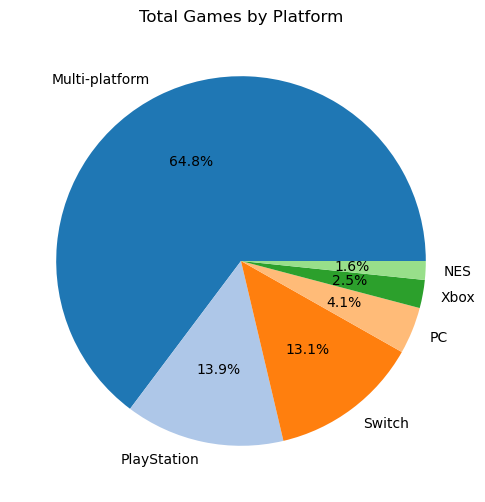

In [11]:
plt.figure(figsize=(6, 6))
plt.pie(total_games_by_platform, labels=total_games_by_platform.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Total Games by Platform')
plt.show()

In [12]:
xbox_titles = df[df['Platform'] == 'Xbox']['Title']
print(xbox_titles)

17    Halo: Combat Evolved
46                 Gears 5
61         Forza Horizon 4
Name: Title, dtype: object


In [13]:
ps_titles = df[df['Platform'] == 'PlayStation']['Title']
print(ps_titles)

7                              God of War
27               Final Fantasy VII Remake
28                              Persona 5
32                             Bloodborne
33                      Horizon Zero Dawn
34                 The Last of Us Part II
35                             Spider-Man
42                      Ghost of Tsushima
54                                 Nioh 2
77                         The Last of Us
82                 Shadow of the Colossus
84                 Horizon Forbidden West
90                               Returnal
96     Marvel's Spider-Man: Miles Morales
98                      Final Fantasy XVI
109           Ratchet & Clank: Rift Apart
112              Sackboy: A Big Adventure
Name: Title, dtype: object


In [14]:
switch_titles = df[df['Platform'] == 'Switch']['Title']
print(switch_titles)

13        Super Smash Bros. Ultimate
15     Animal Crossing: New Horizons
20               Super Mario Odyssey
30                        Splatoon 2
36         Fire Emblem: Three Houses
37            Xenoblade Chronicles 2
44                 Luigi's Mansion 3
57                       Bayonetta 2
58                      Astral Chain
59               Mario Kart 8 Deluxe
64          Pokemon Sword and Shield
65                Ring Fit Adventure
66                          Splatoon
85                     Metroid Dread
99                       Bayonetta 3
107              Monster Hunter Rise
Name: Title, dtype: object


In [15]:
pc_titles = df[df['Platform'] == 'PC']['Title']
print(pc_titles)

8       League of Legends
18             The Sims 4
49               Valorant
74            Half-Life 2
93    The Stanley Parable
Name: Title, dtype: object


In [16]:
nes_titles = df[df['Platform'] == 'NES']['Title']
print(nes_titles)

0       Super Mario Bros
1    The Legend of Zelda
Name: Title, dtype: object


In [17]:
mp_titles = df[df['Platform'] == 'Multi-platform']['Title']
print(mp_titles)

2                         Minecraft
3                            Tetris
4      Call of Duty: Modern Warfare
5          The Witcher 3: Wild Hunt
6                          Fortnite
                   ...             
117                       Deathloop
118                    The Pathless
119                      12 Minutes
120                       Biomutant
121                  Genshin Impact
Name: Title, Length: 79, dtype: object


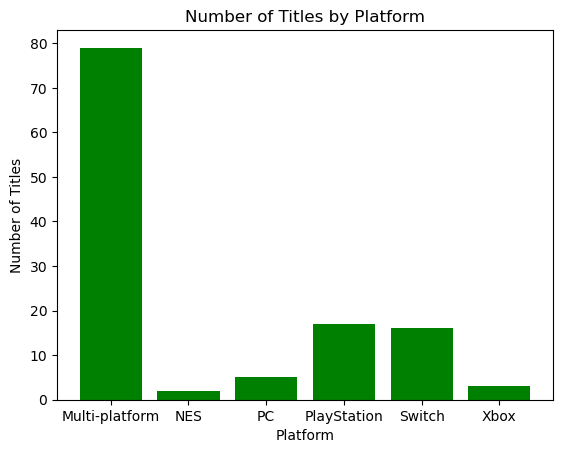

In [18]:
plt.bar(titles_by_platform.index, titles_by_platform.values, color='green')
plt.xlabel('Platform')
plt.ylabel('Number of Titles')
plt.title('Number of Titles by Platform')
plt.show()

In [19]:
platform_avg_rating = df.groupby('Platform')['AvgRating'].mean()

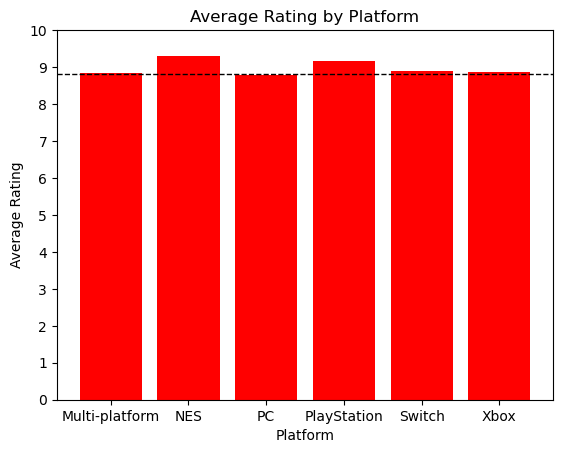

In [20]:
plt.bar(platform_avg_rating.index, platform_avg_rating.values, color='red')
plt.xlabel('Platform')
plt.ylabel('Average Rating')
plt.yticks(range(11))
plt.axhline(y=8.8, color='black', linestyle='--', linewidth=1)
plt.title('Average Rating by Platform')
plt.show()

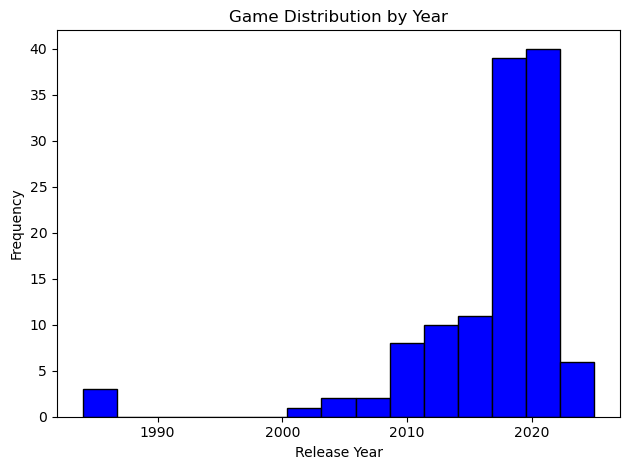

In [21]:
plt.hist(df['ReleaseYear'], bins=15, color='blue', edgecolor='black')
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.title("Game Distribution by Year")
plt.tight_layout()
plt.show()

In [22]:
total_games_by_genre = df['Genre'].value_counts()

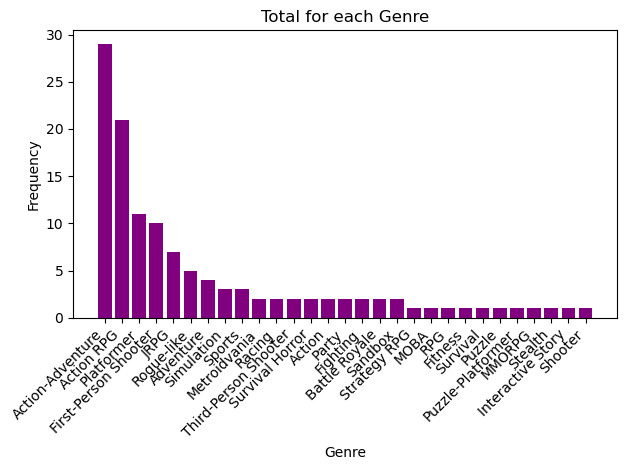

In [24]:
plt.bar(total_games_by_genre.index, total_games_by_genre.values, color='purple')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.title('Total for each Genre')
plt.tight_layout()
plt.show()

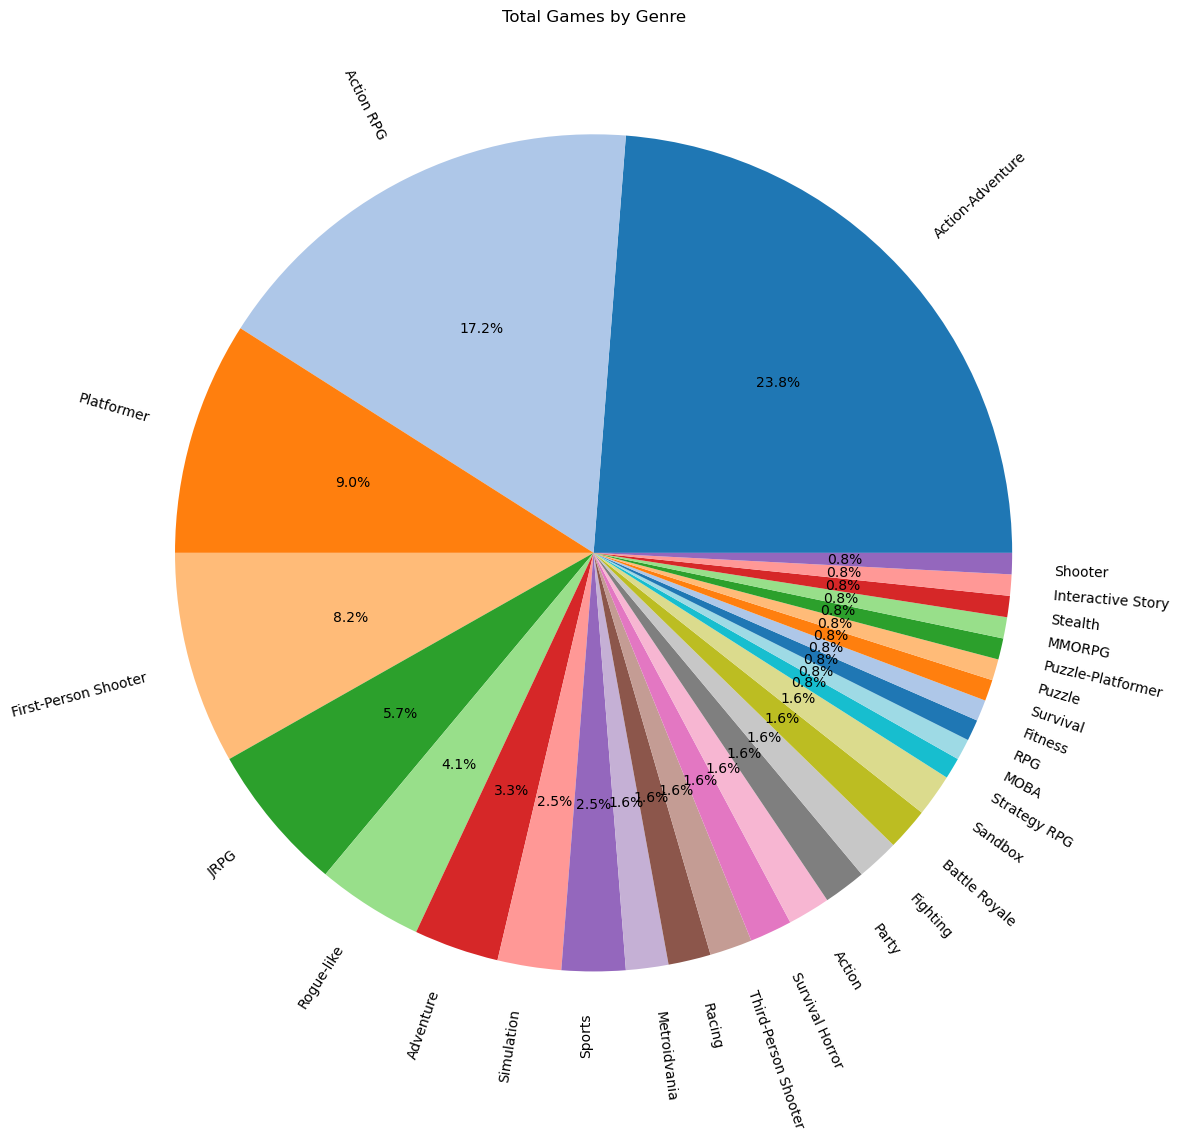

In [25]:
plt.figure(figsize=(12, 12))
plt.pie(total_games_by_genre, labels=total_games_by_genre.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors, rotatelabels=True, labeldistance=1.1)
plt.title('Total Games by Genre')
plt.tight_layout()
plt.show()

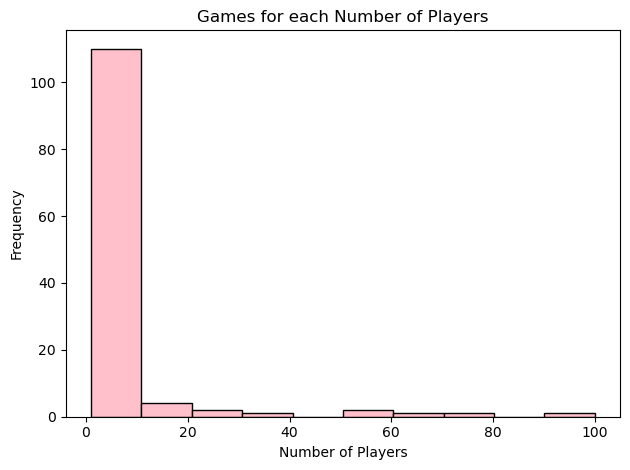

In [26]:
plt.hist(df['NumPlayers'], bins=10, color='pink', edgecolor='black')
plt.xlabel("Number of Players")
plt.xticks(minor=True)
plt.ylabel("Frequency")
plt.title("Games for each Number of Players")
plt.tight_layout()
plt.show()

In [27]:
single_player = df[df['NumPlayers'] == 1]


In [28]:
single_player.count()


Title          85
Genre          85
Platform       85
ReleaseYear    85
NumPlayers     85
AvgRating      85
dtype: int64

In [29]:
single_player['Title']


0              Super Mario Bros
1           The Legend of Zelda
3                        Tetris
5      The Witcher 3: Wild Hunt
7                    God of War
                 ...           
116       Yakuza: Like a Dragon
117                   Deathloop
118                The Pathless
119                  12 Minutes
120                   Biomutant
Name: Title, Length: 85, dtype: object

In [30]:
single_players_platforms = single_player.groupby('Platform').size()


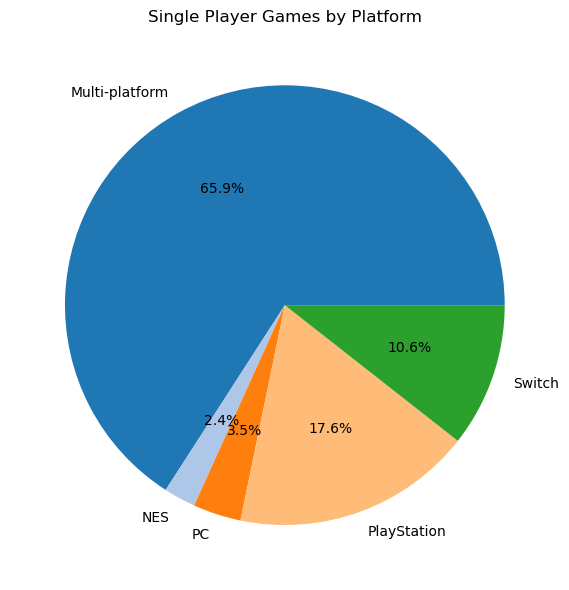

In [31]:
plt.figure(figsize=(6, 6))
plt.pie(single_players_platforms, labels=single_players_platforms.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Single Player Games by Platform')
plt.tight_layout()
plt.show()

In [32]:
multiplayer = df[df['NumPlayers'] != 1]

In [33]:
multiplayer.count()


Title          37
Genre          37
Platform       37
ReleaseYear    37
NumPlayers     37
AvgRating      37
dtype: int64

In [34]:
multiplayer['Platform']

2      Multi-platform
4      Multi-platform
6      Multi-platform
8                  PC
9      Multi-platform
10     Multi-platform
11     Multi-platform
13             Switch
14     Multi-platform
15             Switch
17               Xbox
19     Multi-platform
23     Multi-platform
25     Multi-platform
26     Multi-platform
30             Switch
31     Multi-platform
40     Multi-platform
45     Multi-platform
46               Xbox
47     Multi-platform
48     Multi-platform
49                 PC
50     Multi-platform
54        PlayStation
59             Switch
61               Xbox
64             Switch
66             Switch
68     Multi-platform
69     Multi-platform
76     Multi-platform
104    Multi-platform
107            Switch
112       PlayStation
115    Multi-platform
121    Multi-platform
Name: Platform, dtype: object

In [35]:
multiplayer['Title']

2                          Minecraft
4       Call of Duty: Modern Warfare
6                           Fortnite
8                  League of Legends
9                 Grand Theft Auto V
10                         Overwatch
11             Red Dead Redemption 2
13        Super Smash Bros. Ultimate
14                          Among Us
15     Animal Crossing: New Horizons
17              Halo: Combat Evolved
19      Fall Guys: Ultimate Knockout
23                    Stardew Valley
25                      Apex Legends
26                     Rocket League
30                        Splatoon 2
31             Monster Hunter: World
40                  Mortal Kombat 11
45                           Cuphead
46                           Gears 5
47                           FIFA 21
48                          NBA 2K21
49                          Valorant
50                     Battlefield V
54                            Nioh 2
59               Mario Kart 8 Deluxe
61                   Forza Horizon 4
6

In [36]:
multiplayer_platforms = multiplayer.groupby('Platform').size()

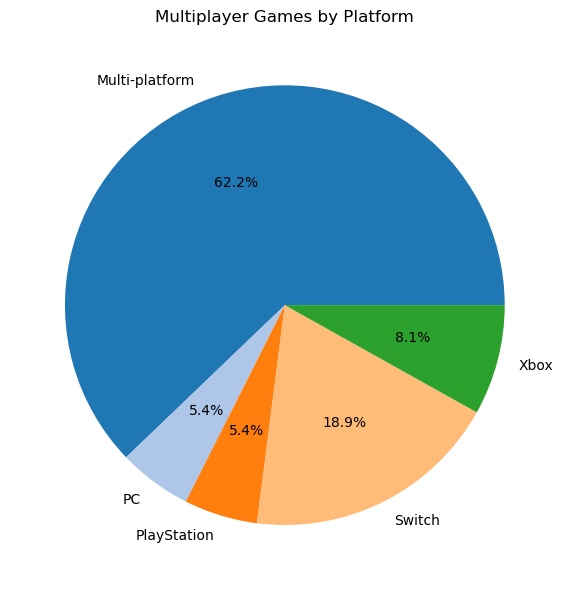

In [37]:
plt.figure(figsize=(6, 6))
plt.pie(multiplayer_platforms, labels=multiplayer_platforms.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Multiplayer Games by Platform')
plt.tight_layout()
plt.show()

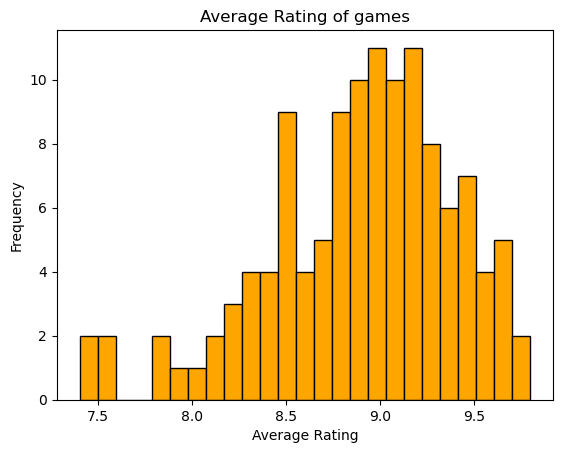

In [38]:
plt.hist(df['AvgRating'], bins=25, color='orange', edgecolor='black')
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.title("Average Rating of games")

plt.show()

In [39]:
highly_rated_games = df[df['AvgRating'] >= 9.5]

In [40]:
highly_rated_games.count()

Title          18
Genre          18
Platform       18
ReleaseYear    18
NumPlayers     18
AvgRating      18
dtype: int64

In [41]:
highly_rated_games['Title']

2                                 Minecraft
5                  The Witcher 3: Wild Hunt
7                                God of War
9                        Grand Theft Auto V
11                    Red Dead Redemption 2
20                      Super Mario Odyssey
24                                    Hades
70                                  Journey
74                              Half-Life 2
75                            Mass Effect 2
76                                 Portal 2
77                           The Last of Us
78     Metal Gear Solid V: The Phantom Pain
79                                 BioShock
82                   Shadow of the Colossus
94                                 Hades II
97                               Elden Ring
101                    The Elder Scrolls VI
Name: Title, dtype: object

In [42]:
highly_rated_games['ReleaseYear']

2      2011
5      2015
7      2018
9      2013
11     2018
20     2017
24     2020
70     2012
74     2004
75     2010
76     2011
77     2013
78     2015
79     2007
82     2005
94     2023
97     2022
101    2025
Name: ReleaseYear, dtype: int64

In [43]:
highly_rated_games['Genre']

2                   Sandbox
5                Action RPG
7          Action-Adventure
9          Action-Adventure
11         Action-Adventure
20               Platformer
24               Rogue-like
70                Adventure
74     First-Person Shooter
75               Action RPG
76        Puzzle-Platformer
77         Action-Adventure
78         Action-Adventure
79     First-Person Shooter
82         Action-Adventure
94               Rogue-like
97               Action RPG
101              Action RPG
Name: Genre, dtype: object

In [44]:
highly_rated_game_genre = highly_rated_games['Genre'].value_counts()

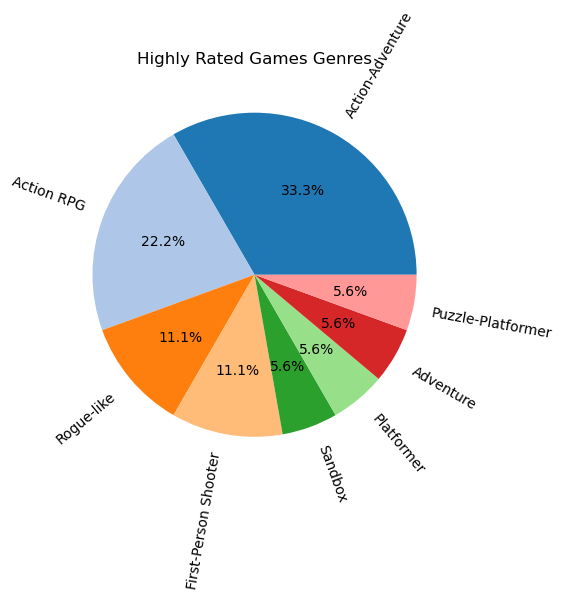

In [45]:
plt.figure(figsize=(6, 6))
plt.pie(highly_rated_game_genre, labels=highly_rated_game_genre.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors, rotatelabels=True)
plt.title('Highly Rated Games Genres')
plt.tight_layout()
plt.show()

In [46]:
highly_rated_games['Platform']

2      Multi-platform
5      Multi-platform
7         PlayStation
9      Multi-platform
11     Multi-platform
20             Switch
24     Multi-platform
70     Multi-platform
74                 PC
75     Multi-platform
76     Multi-platform
77        PlayStation
78     Multi-platform
79     Multi-platform
82        PlayStation
94     Multi-platform
97     Multi-platform
101    Multi-platform
Name: Platform, dtype: object

In [47]:
highly_rated_games.to_csv("GamesToPlay.csv", index=False)

In [48]:
low_rated_games = df[df['AvgRating'] <= 8.2]

In [49]:
low_rated_games.count()

Title          13
Genre          13
Platform       13
ReleaseYear    13
NumPlayers     13
AvgRating      13
dtype: int64

In [50]:
low_rated_games.Title

14                     Among Us
16               Cyberpunk 2077
18                   The Sims 4
47                      FIFA 21
48                     NBA 2K21
50                Battlefield V
63                 No Man's Sky
66                     Splatoon
103      Immortals Fenyx Rising
111                       Sable
112    Sackboy: A Big Adventure
119                  12 Minutes
120                   Biomutant
Name: Title, dtype: object

In [51]:
low_rated_games.ReleaseYear

14     2018
16     2020
18     2014
47     2020
48     2020
50     2018
63     2016
66     2015
103    2020
111    2021
112    2020
119    2021
120    2021
Name: ReleaseYear, dtype: int64

In [52]:
low_rated_games.Genre

14                    Party
16               Action RPG
18               Simulation
47                   Sports
48                   Sports
50     First-Person Shooter
63         Action-Adventure
66     Third-Person Shooter
103        Action-Adventure
111               Adventure
112              Platformer
119               Adventure
120              Action RPG
Name: Genre, dtype: object

In [53]:
low_rated_game_genre = low_rated_games['Genre'].value_counts()

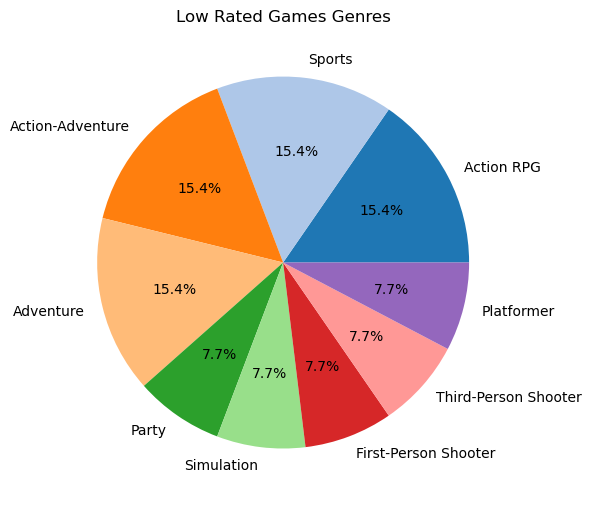

In [54]:
plt.figure(figsize=(6, 6))
plt.pie(low_rated_game_genre, labels=low_rated_game_genre.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Low Rated Games Genres')
plt.tight_layout()
plt.show()

In [55]:
low_rated_games.Platform

14     Multi-platform
16     Multi-platform
18                 PC
47     Multi-platform
48     Multi-platform
50     Multi-platform
63     Multi-platform
66             Switch
103    Multi-platform
111    Multi-platform
112       PlayStation
119    Multi-platform
120    Multi-platform
Name: Platform, dtype: object

In [56]:
low_rated_games.to_csv("DoNotPlay.csv", index=False)

In [57]:
top_rated_index = df['AvgRating'].idxmax()
top_rated_title = df.loc[top_rated_index, 'Title']
print(top_rated_title)

God of War


In [58]:
lowest_rated_index = df['AvgRating'].idxmin()
lowest_rated_title = df.loc[lowest_rated_index, 'Title']
print(lowest_rated_title)

NBA 2K21
